In [1]:
# The csv file is a modified version of the original dataset providad by Aylien.com (Data from Nov 2019 to Apr 5 2020)
# In addition to the text, it contains: Date Author Sentiment, plus tokenized+lemmatized Text.

import gensim
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import math
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pickle

In [ ]:
mydf = pd.read_csv('/DIR/complete_df.csv')

In [ ]:
# Setting the time groups. Data has to be processed in chunks due to the size of the dataset.

#date1 = prior to China releasing information on human-to-human transmission and first case in the US

date_all = ['2019-11-18', '2019-11-27', '2019-12-05', '2019-12-12', 
         '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
         '2019-12-26', '2019-12-27','2020-01-01', '2020-01-02',
         '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
         '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
         '2020-01-15', '2020-01-16', '2020-01-17','2020-01-18',
         '2020-01-19','2020-01-25','2020-01-26','2020-01-27','2020-01-28','2020-01-29',
         '2020-02-14', '2020-02-15','2020-02-16','2020-02-17', '2020-02-18',
         '2020-03-10','2020-03-11', '2020-03-12','2020-03-13','2020-04-03','2020-04-04']

date1 = ['2019-11-01', '2019-11-11', '2019-11-14', '2019-11-15',
         '2019-11-18', '2019-11-27', '2019-12-05', '2019-12-12', 
         '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
         '2019-12-26', '2019-12-27','2020-01-01', '2020-01-02',
         '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
         '2020-01-07','2020-01-08', '2020-01-09', '2020-01-10',
         '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
         '2020-01-15', '2020-01-16', '2020-01-17','2020-01-18',
         '2020-01-19'] 

# 5-day timeframes

date2 = ['2020-01-20','2020-01-21','2020-01-22','2020-01-23','2020-01-24'] 
       
date3 = ['2020-01-25','2020-01-26','2020-01-27','2020-01-28','2020-01-29']

date4 = ['2020-01-30','2020-01-31','2020-02-01','2020-02-02', '2020-02-03']

date5 = ['2020-02-04','2020-02-05''2020-02-06', '2020-02-07','2020-02-08']

date6 = ['2020-02-09','2020-02-10', '2020-02-11','2020-02-12', '2020-02-13']

date7 = ['2020-02-14', '2020-02-15','2020-02-16','2020-02-17', '2020-02-18']
    
date8 = ['2020-02-19','2020-02-20', '2020-02-21','2020-02-22', '2020-02-23']

date9 = ['2020-02-24', '2020-02-25','2020-02-26','2020-02-27','2020-02-28']

date10 = ['2020-02-29','2020-03-01', '2020-03-02','2020-03-03','2020-03-04']

date11 = ['2020-03-05', '2020-03-06','2020-03-07','2020-03-08', '2020-03-09']

date12 = ['2020-03-10','2020-03-11', '2020-03-12','2020-03-13', '2020-03-14']
    
date13 = ['2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19']

date14 = ['2020-03-20', '2020-03-21','2020-03-22','2020-03-23', '2020-03-24']

date15 = ['2020-03-05','2020-03-26','2020-03-27','2020-03-28','2020-03-29']

date16 = ['2020-03-30','2020-03-31','2020-04-01', '2020-04-02', '2020-04-03']

date17 = ['2020-04-04', '2020-04-05']

## Dictionary and Corpus

In this step we create the dictionary and corpus. 
To improve the quality of the topics, we create bigrams, as they express collocations.

Given the size of the data, we are going to save each corpus chunk as a pickle. Later, we will load each file and put them together to obtain the full corpus.

In [ ]:
# Getting bigrams.

def get_bigram(date):
    final_text = [sent.split() for sent in date['Cleaned text']]
    bigram = gensim.models.Phrases(final_text, min_count=5, threshold=50)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    bigram_text = [bigram_mod[doc]for doc in final_text]
    return bigram_text

#Create dictionary. Use once, afterwards, use the update function.

def get_dict(f):
    news_dictionary = Dictionary(f)
    return news_dictionary

my_dict = get_dict(date1)

In [ ]:
# Update dictionary with new text

my_dict.add_documents(date_n)

In [ ]:
# Build the corpus. Include bigrams.

def get_corpus(date, dictionary):
    final_text = [sent.split() for sent in mydf.loc[mydf.Date.isin(date)]['Cleaned text']]
    bigram = gensim.models.Phrases(final_text, min_count=5, threshold=50)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    bigram_text = [bigram_mod[doc]for doc in final_text]
    news_corpus = [dictionary.doc2bow(news) for news in bigram_text]
    return news_corpus

corpus_1 = get_corpus(date1, my_dict)

In [ ]:
# Save each corpus chunk as pickle.

import pickle
with open('/DIR/bigram_corpus_p1','wb') as f:
    pickle.dump(corpus_n,f)

## Training the LDA model

We will create a corpus using roughly the first half of the news.

In order to determine the optimal number of topics, we will create multiple models and compare them.
We will determine their fitness in terms of intrinsec coherence (UMass). 

After defining the number of topics, we will train our model and confirm our selection by judging the quality of the topics from our intuition.

In [2]:
# Load prefab dictionary and corpus

# Remove extreme (extremely common or extremely rare) words from the corpus. Final size = 100,000 entries.

news_dictionary = Dictionary.load_from_text('new-covid-news-lda-dictionary-final')
news_dictionary.filter_extremes()

with open('bi_corpus_1half.pkl', 'rb') as f:
    corpus1 = pickle.load(f)
    
#final_corpus = corpus1 + corpus2


In [4]:
news_dictionary = Dictionary.load_from_text('new-covid-news-lda-dictionary-final')

In [5]:
# Looking for the optimal number of topics
# Code based on Kapadia's entry: https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

def get_coherence(corpus, dictionary):
    news_coherence = []
    for n in range(3,9):
        lda = LdaModel(corpus, num_topics = n, id2word = dictionary, passes=2, alpha='auto')
        cohm = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')
        coh = cohm.get_coherence()
        news_coherence.append(coh)

    return news_coherence

get_coherence(corpus1, news_dictionary)

[-0.9220549945314951,
 -1.0560389494558242,
 -1.127978790368331,
 -1.139691507708892,
 -1.257838232299952,
 -1.1864025359320818]

In [7]:
# Training our final 

news_lda = LdaModel(corpus1, num_topics = 5, id2word = news_dictionary, passes=2, alpha='auto')


In [14]:
#plot top words for each topic 

def plot_top_words(lda, nb_topics):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(nb_topics))+1,round(math.sqrt(nb_topics))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(30,20))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(12), top_betas[i][:12], align='center',color='green', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(12))
        ax.set_yticklabels(top_words[i][:12])
        plt.title("Topic "+str(i))

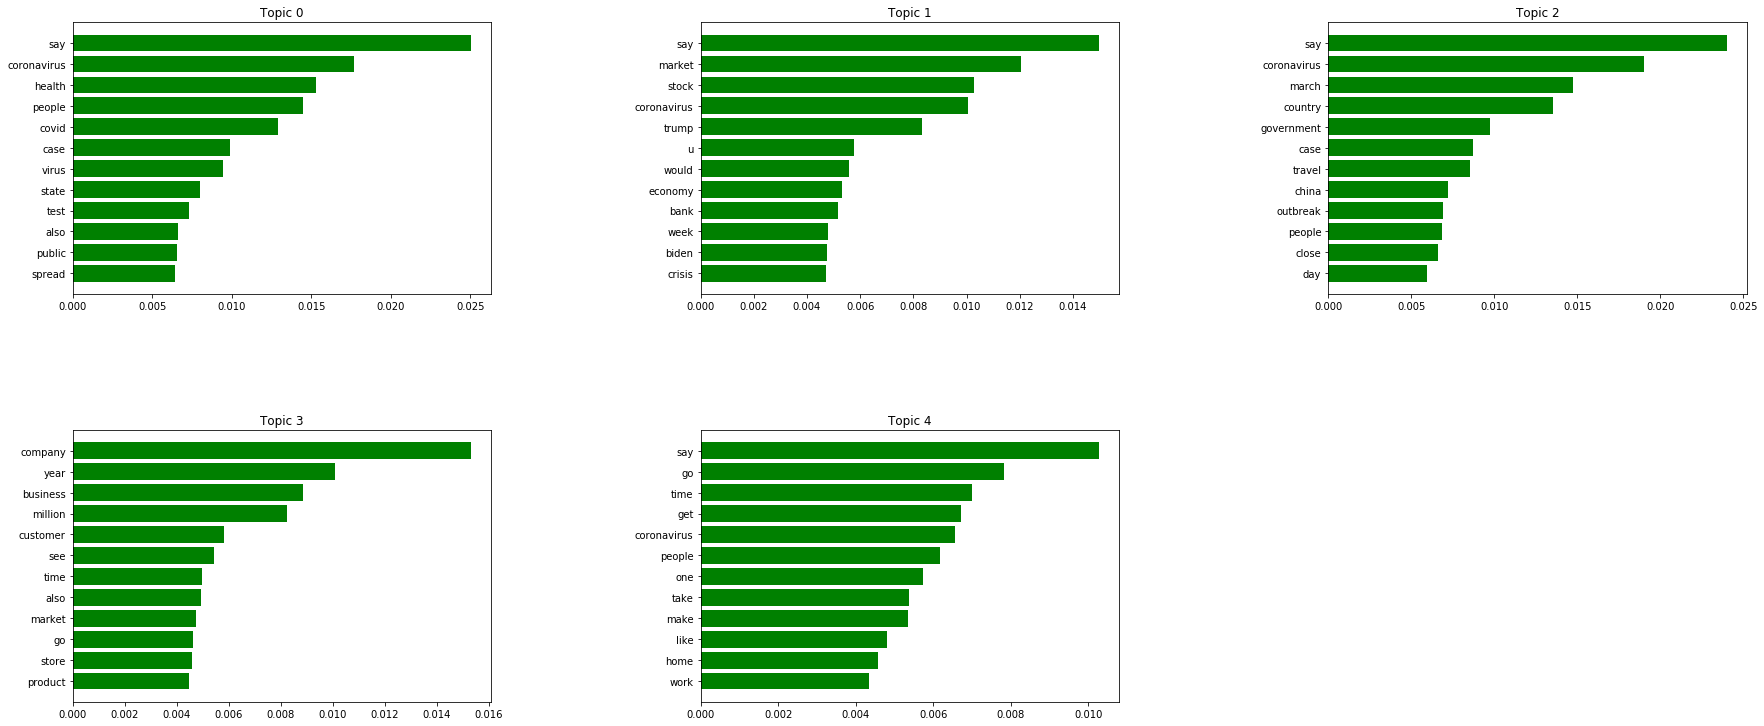

In [15]:
plot_top_words(news_lda, 5)

In [21]:
del corpus2

with open('bi_corpus_2half.pkl', 'rb') as g:
    corpus2 = pickle.load(g)
    
news_lda.update(corpus2, passes=2)

In [23]:
# Get coherence of the final model
# Coherence score improved with respect to the previous verion of the model.

cohm = CoherenceModel(model=news_lda, corpus=corpus2, dictionary=news_dictionary, coherence='u_mass')
coh = cohm.get_coherence()
print(coh)

-1.0606335506657705


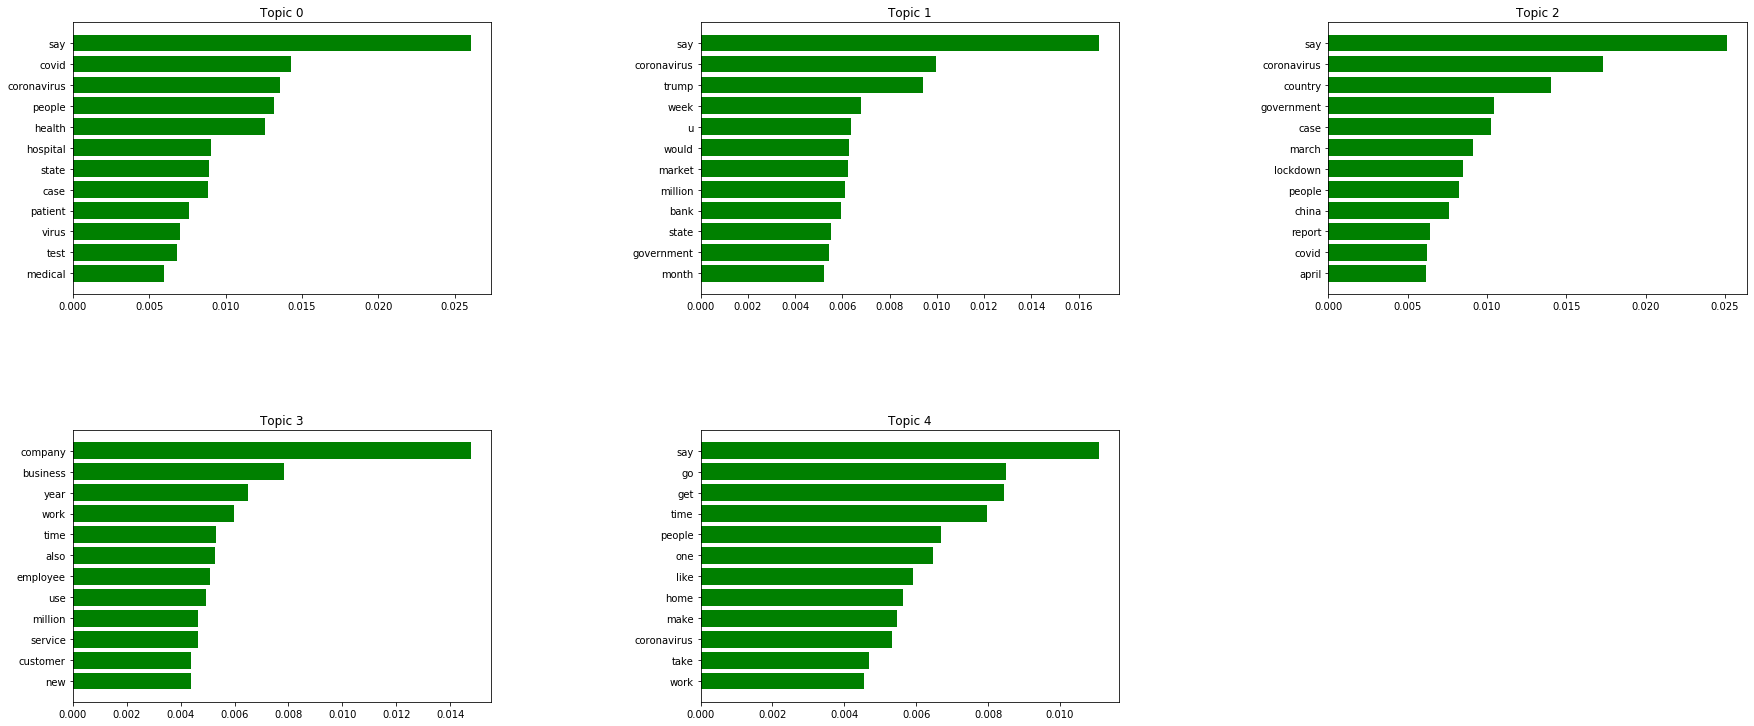

In [24]:
# plot top words for each topic of the final model.
# We observe the topics are not so different from those obtained with the first half of the corpus.

plot_top_words(news_lda, 5)

## Diachronic topic distribution

With our model trained, we can now look at the evolution of the topics across time. We will load the pickled corpus chunks we saved earlier and get their topic distribution one by one.

The topic distribution probability was obtained for each group of dates.

In [26]:
del corpus2

with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p1.pkl', 'rb') as f:
    corp_c1 = pickle.load(f)
    
with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p2.pkl', 'rb') as g:
    corp_c2 = pickle.load(g)

In [28]:
dates1_topics = [news_lda.get_document_topics(n) for n in corp_c1]
dates2_topics = [news_lda.get_document_topics(n) for n in corp_c2]

In [2]:
# we create a list for each topic probability. The output of the function will be 
# a list with the different topic distributions foe each group of dates

def get_doc_topics(set_of_docs):
    
    top_0 = []
    top_1 = []
    top_2 = []
    top_3 = []
    top_4 = []
    all_tops = [top_0, top_1, top_2, top_3, top_4]
    mean_tops = []
    
    for n in set_of_docs:
        for i in n:
            if i[0] == 0:
                top_0.append(i[1])
            if i[0] == 1:
                top_1.append(i[1])
            if i[0] == 2:
                top_2.append(i[1])
            if i[0] == 3:
                top_3.append(i[1])
            if i[0] == 4:
                top_4.append(i[1])
    for top in all_tops:
        mean_top = sum(top)/len(top)
        mean_tops.append(mean_top)
    return mean_tops

In [30]:
get_doc_topics(dates1_topics)

[0.14398811344307122,
 0.1447186293039057,
 0.22800123701584407,
 0.2223606218610491,
 0.2748595023643499]

In [32]:
get_doc_topics(dates2_topics)

[0.13655586315863802,
 0.14387044116010875,
 0.22514103053432913,
 0.25570155285232565,
 0.2632349345264203]

## Topic distribution and sentiment

Treating each document's topic distribution as a 5-element feature vector, we analyze each featuer's weight in predicting sentiment (already annotated in the dataset) of each article. 

After that, we train a Random Forest classifier to determine whether topic distribution is a good predictor of sentiment. 

In [2]:
# Sample containing the first 9 date groups. 

with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p1.pkl', 'rb') as f:
    corp1 = pickle.load(f)
    
with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p2.pkl', 'rb') as g:
    corp2 = pickle.load(g)
    
with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p3.pkl', 'rb') as h:
    corp3 = pickle.load(h)

with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p4.pkl', 'rb') as i:
    corp4 = pickle.load(i)
    
with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p5.pkl', 'rb') as j:
    corp5 = pickle.load(j)
    
with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p6.pkl', 'rb') as k:
    corp6 = pickle.load(k)
    
with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p7.pkl', 'rb') as l:
    corp7 = pickle.load(l)
    
with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p8.pkl', 'rb') as m:
    corp8 = pickle.load(m)
    
with open('/media/erickgch/ExHD/hlt-lda-covid/corpus/bigram_corpus_p9.pkl', 'rb') as a:
    corp9 = pickle.load(a)

In [3]:
corp = corp1 + corp2+ corp3 + corp4 + corp5 + corp6 + corp7 + corp8 + corp9
del corp1, corp2, corp3, corp4, corp5, corp6, corp7, corp8, corp9

In [4]:
news_lda = LdaModel.load('news_model_complete')

In [5]:
def get_doc_topics_sentiment(set_of_docs):
    
    big_list = []
    
    for n in set_of_docs:
        temp_list = [0, 0, 0, 0, 0]
        for i in n:
            if i[0] == 0:
                temp_list[0] = i[1]
            if i[0] == 1:
                temp_list[1] = i[1]
            if i[0] == 2:
                temp_list[2] = i[1]
            if i[0] == 3:
                temp_list[3] = i[1]
            if i[0] == 4:
                temp_list[4] = i[1]
        big_list.append(temp_list)
    return big_list

In [6]:
all_topics = [news_lda.get_document_topics(n) for n in corp]

In [7]:
# import complete_df, extract sentiment and create a new df consisting of feature vectors and sentiment

mydf = pd.read_csv('/media/erickgch/ExHD/hlt-lda-covid/complete_df.csv')

data = {'Topics':get_doc_topics_sentiment(all_topics), 'Sentiment':mydf.Sentiment[:len(corp)]}

df = pd.DataFrame(data)
del mydf, all_topics

In [8]:
# cleaning up the data (there seem to be some cells in ' sentiment ' that are not {negative, neutral, positive})

df.dropna(axis=0, inplace=True)

sent_list = [sent.split()[2] .strip("','") for sent in df.Sentiment]
df['Sentimentvalue'] = sent_list

In [9]:
df

,Topics,Sentiment,Sentimentvalue
0,"[0.40380657, 0.06929052, 0, 0.51803005, 0]","{'body': {'polarity': 'positive', 'score': 0.9...",positive
1,"[0.5303818, 0, 0, 0.46177316, 0]","{'body': {'polarity': 'negative', 'score': 0.7...",negative
2,"[0.6223381, 0, 0, 0.3684119, 0]","{'body': {'polarity': 'positive', 'score': 0.8...",positive
3,"[0.30561632, 0.0383771, 0, 0.6553226, 0]","{'body': {'polarity': 'positive', 'score': 0.4...",positive
4,"[0.4706259, 0.031383798, 0.019068772, 0.478708...","{'body': {'polarity': 'positive', 'score': 0.5...",positive
...,...,...,...
84181,"[0.1415901, 0.13787453, 0.17065836, 0.54614186...","{'body': {'polarity': 'negative', 'score': 0.6...",negative
84182,"[0.014269548, 0.7832211, 0, 0.1920738, 0]","{'body': {'polarity': 'negative', 'score': 0.9...",negative
84183,"[0, 0.548382, 0.41247702, 0, 0.034648005]","{'body': {'polarity': 'negative', 'score': 0.6...",negative
84184,"[0.794912, 0.015797712, 0.02158041, 0.16716295...","{'body': {'polarity': 'negative', 'score': 0.4...",negative


In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

X = [n for n in df.Topics]
X = np.array(X)[:50000]
y = df.Sentimentvalue[:50000]

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 0 (0.284553)
2. feature 3 (0.209335)
3. feature 1 (0.208432)
4. feature 2 (0.160144)
5. feature 4 (0.137535)


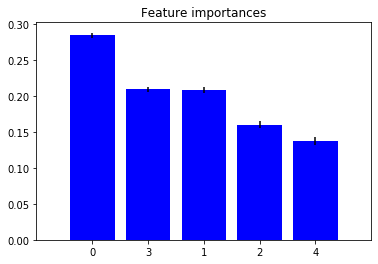

In [11]:
import matplotlib.pyplot as plt
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer# Create feature vectors
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

#Over/undersampling with SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_res, y_res = sm.fit_sample(X, y)

In [15]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
tree_clf = RandomForestClassifier(n_estimators=250,max_depth=20, criterion='entropy',
                                  min_samples_split=5,random_state=0)

print(cross_val_score(tree_clf, X_res, y_res, cv=5))

[0.44096231 0.4164763  0.48336665 0.52937817 0.555151  ]
